# Zomato Data Analysis 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('Zomato.csv')
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
data.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [7]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [8]:
# convert data type of rate
def ratings(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
data['rate']=data['rate'].apply(ratings)
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [9]:
# now change the type of data from online_order and book_table
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['online_order'])
pd.Series(df)

0      1
1      1
2      1
3      0
4      0
      ..
143    0
144    0
145    1
146    0
147    1
Length: 148, dtype: int32

In [10]:
data['online_order']=df
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,Yes,4.1,775,800,Buffet
1,Spice Elephant,1,No,4.1,787,800,Buffet
2,San Churro Cafe,1,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,No,3.7,88,300,Buffet
4,Grand Village,0,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,0,No,3.3,0,100,Dining
144,New Indraprasta,0,No,3.3,0,150,Dining
145,Anna Kuteera,1,No,4.0,771,450,Dining
146,Darbar,0,No,3.0,98,800,Dining


In [12]:
table=lab_enc.fit_transform(data['book_table'])
pd.Series(table)

0      1
1      0
2      0
3      0
4      0
      ..
143    0
144    0
145    0
146    0
147    0
Length: 148, dtype: int32

In [13]:
data['book_table']=table
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1,775,800,Buffet
1,Spice Elephant,1,0,4.1,787,800,Buffet
2,San Churro Cafe,1,0,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,Buffet
4,Grand Village,0,0,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,0,0,3.3,0,100,Dining
144,New Indraprasta,0,0,3.3,0,150,Dining
145,Anna Kuteera,1,0,4.0,771,450,Dining
146,Darbar,0,0,3.0,98,800,Dining


In [14]:
data.describe()

,online_order,book_table,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000,148.000000,148.000000
mean,0.391892,0.054054,3.633108,264.810811,418.243243
std,0.489830,0.226892,0.402271,653.676951,223.085098
min,0.000000,0.000000,2.600000,0.000000,100.000000
25%,0.000000,0.000000,3.300000,6.750000,200.000000
50%,0.000000,0.000000,3.700000,43.500000,400.000000
75%,1.000000,0.000000,3.900000,221.750000,600.000000
max,1.000000,1.000000,4.600000,4884.000000,950.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    int32  
 2   book_table                   148 non-null    int32  
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 7.1+ KB


no null values in the DataSet

# Q1. What type of resturant do the majority of customers order from?

In [16]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1,775,800,Buffet
1,Spice Elephant,1,0,4.1,787,800,Buffet
2,San Churro Cafe,1,0,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,Buffet
4,Grand Village,0,0,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Returants')

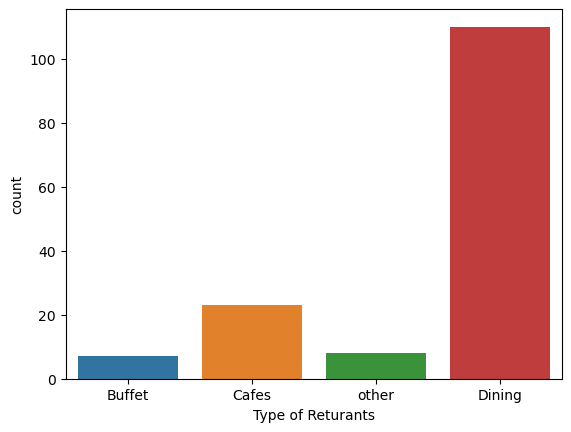

In [17]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel('Type of Returants')

Dining have plus 100 majority of customers who do orders from there.

# Q2. How many votes has each type of resturants recieved from customers

Text(0, 0.5, 'Votes')

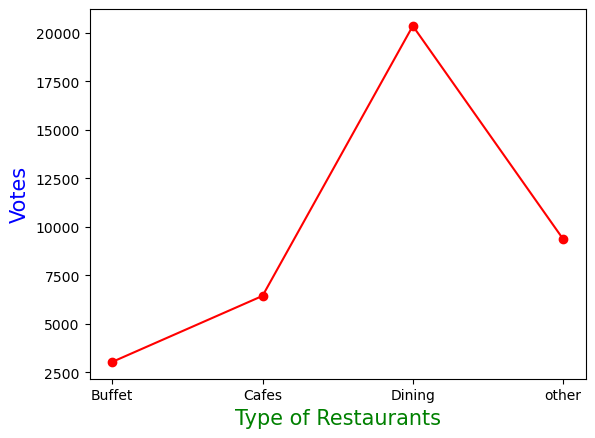

In [22]:
group_data=data.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':group_data})
plt.plot(result,c='red',marker='o')
plt.xlabel('Type of Restaurants',c='green',size=15)
plt.ylabel('Votes',c='blue',size=15)

Dining is maximum voted Resturant

# Q3 What are the ratings that majority of resturants have recieved?

In [24]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1,775,800,Buffet
1,Spice Elephant,1,0,4.1,787,800,Buffet
2,San Churro Cafe,1,0,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,Buffet
4,Grand Village,0,0,3.8,166,600,Buffet


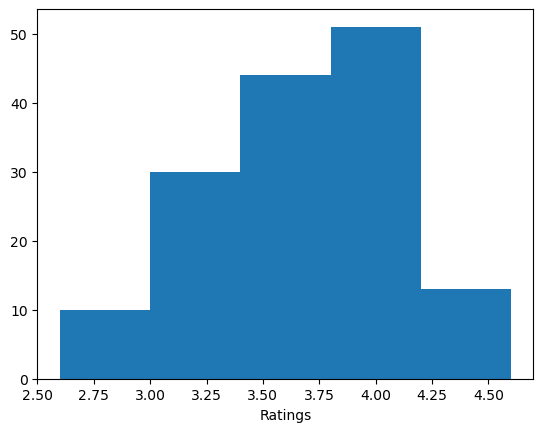

In [28]:
plt.hist(data['rate'],bins=5)
plt.xlabel('Ratings')
plt.show()

Majority of restuarants recieves ratings between 3.5 to 4

# Q4. Zomato has observed that most couples orders most of their food online . What is their average spending on each order?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

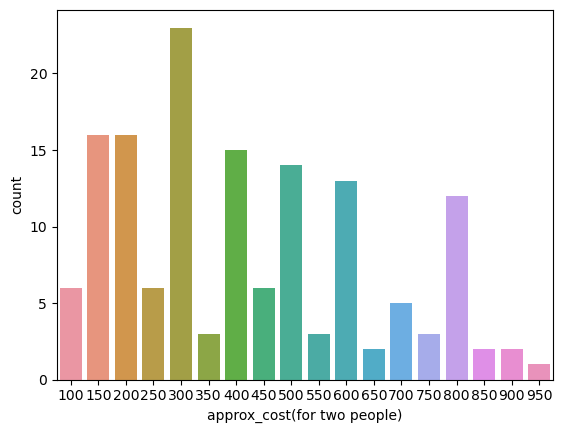

In [40]:
sns.countplot(x=data['approx_cost(for two people)'])

Maximum cost for couples is approx ₹300

# Q5. Which mode (online / offline ) has received the maximum ratings?

<Axes: xlabel='online_order', ylabel='rate'>

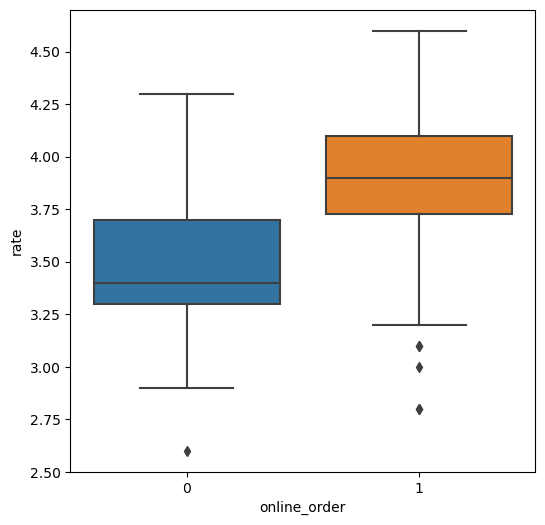

In [42]:
# comaprison between online or offline we will use BoxPlot graph
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=data)

offline order receives lower ratings in comparision to online order

# Q6. Which type of resturnats received more offline orders , so that zomato can provide customers with some good offers?

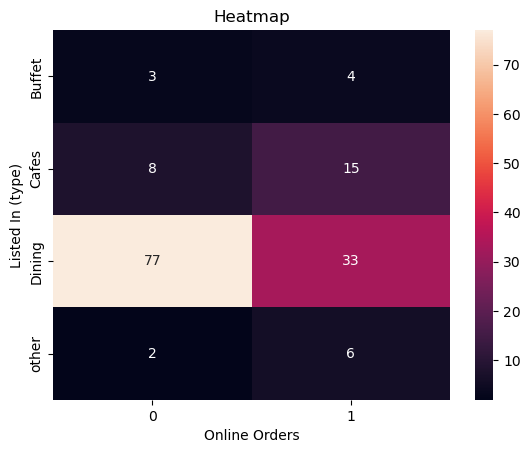

In [45]:
pivot_table=data.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Orders')
plt.ylabel('Listed In (type)')
plt.show()

Dining Resturants prirmarily receives maximum offline orders in comparison of other resturants .